In [1]:
from Functions.class_Graph_TM import Graph_TM
from glob import glob
import networkx as nx
from networkx.algorithms.distance_measures import *
from networkx.algorithms.shortest_paths.generic import *

In [2]:
G = Graph_TM()
files = sorted(glob('Data/*.csv'))
file = files[0]
G.insert_cb(file)

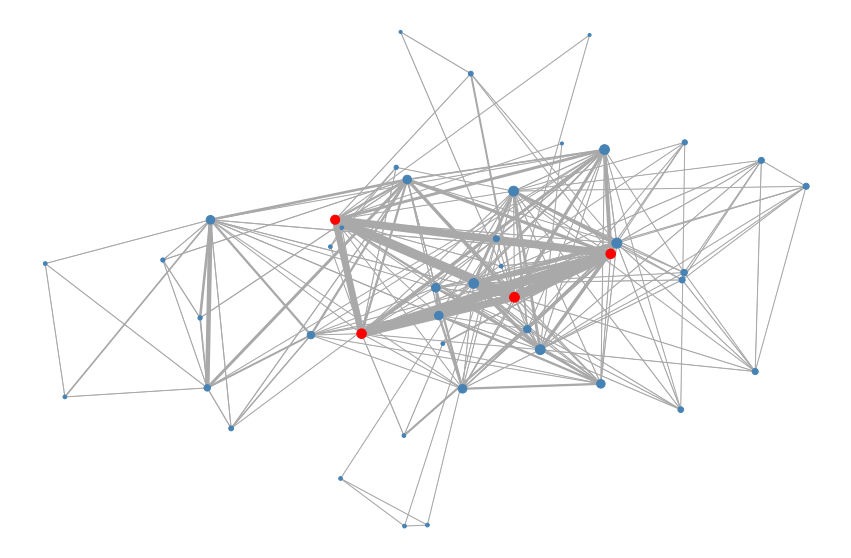

In [3]:
G.plot_network()

In [4]:
file = files[1]
G.insert_cb(file)

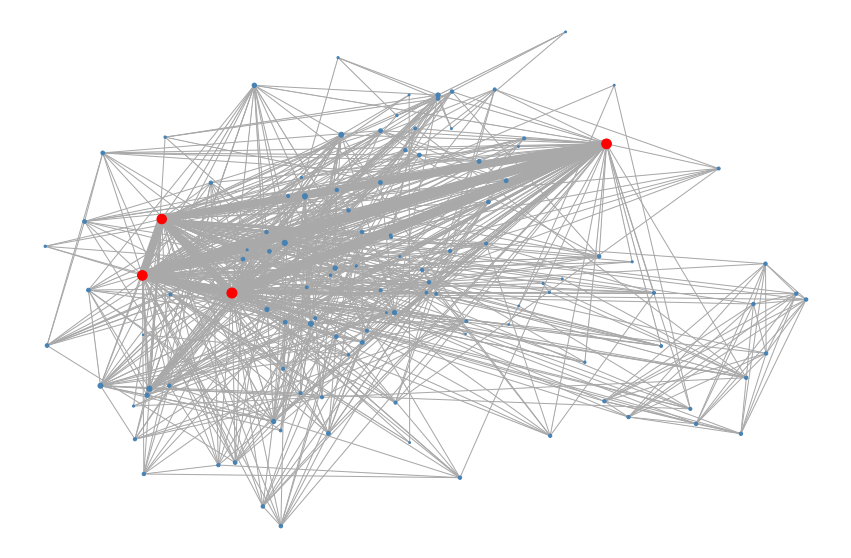

In [5]:
G.plot_network()

In [6]:
file = files[2]
G.insert_cb(file)

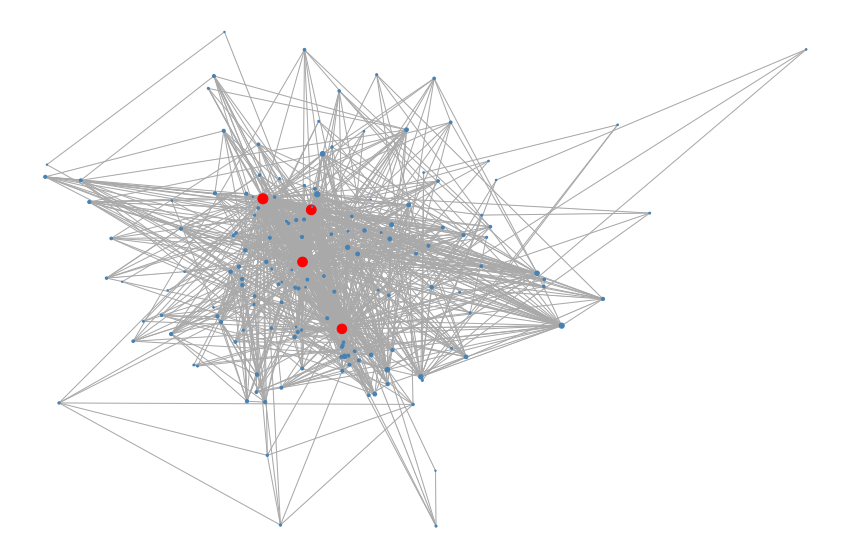

In [7]:
G.plot_network()

In [8]:
file = files[3]
G.insert_cb(file)

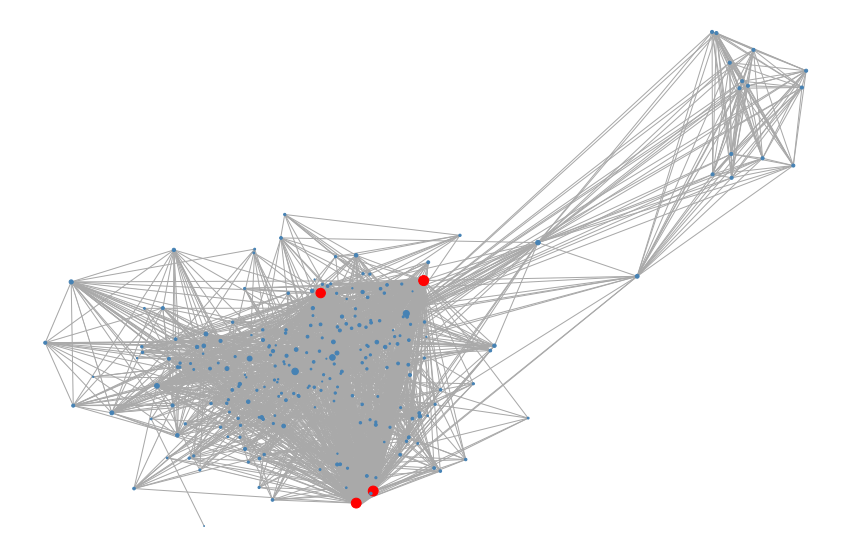

In [9]:
G.plot_network()

In [10]:
G.insert_cbs(files[4:])

Graph saved as ../TeX/img/all_comic_books_biggest_component.png


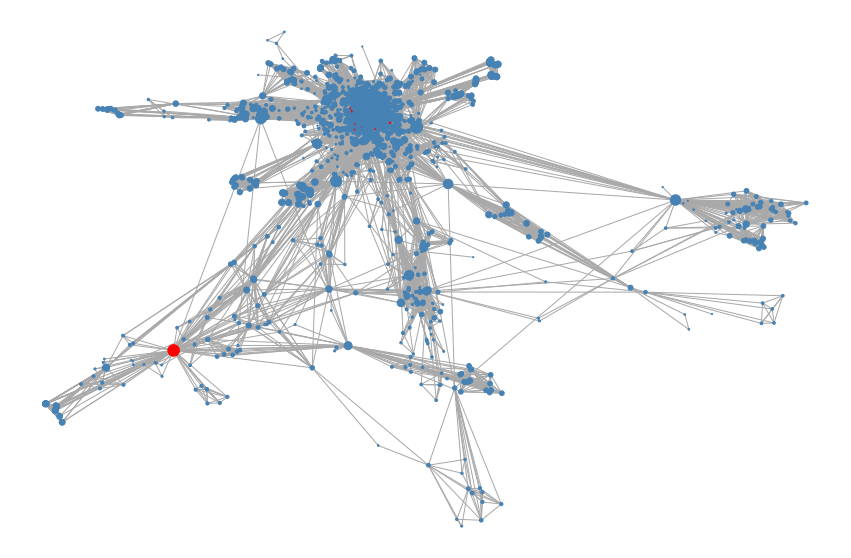

In [11]:
G.plot_network(max_node_size = 1000,
               filename = 'all_comic_books_biggest_component')

Graph saved as ../TeX/img/all_comic_books_all_components.png


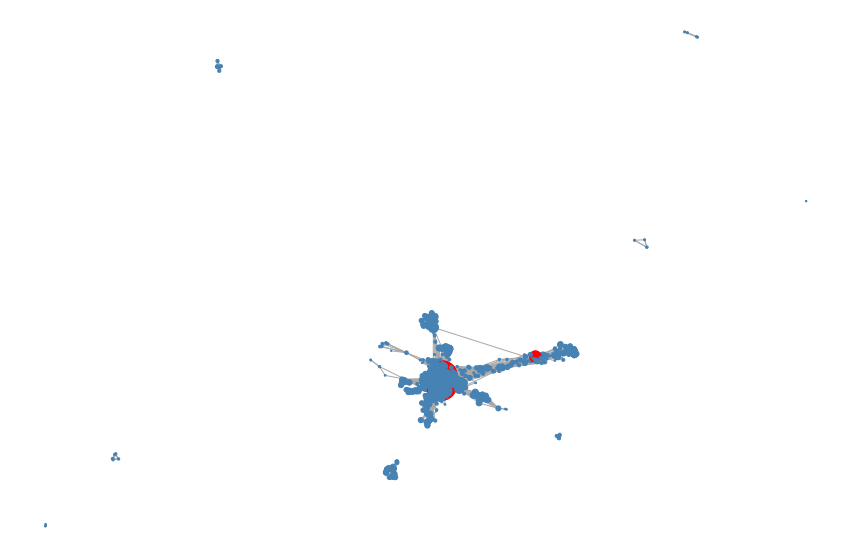

In [12]:
G.plot_network(max_node_size = 1000,
               max_connected_components = 'all',
               filename = 'all_comic_books_all_components')

In [13]:
connected_components = list(nx.connected_components(G.Graph))
print(nx.info(G.Graph))
print(f'Connected components: {len(connected_components)}')

Name: 
Type: Graph
Number of nodes: 1524
Number of edges: 10818
Average degree:  14.1969
Connected components: 10


In [14]:
# trabalhando só com a maior componente conexa
H = nx.subgraph(G.Graph, connected_components[0])
avg_distance = nx.average_shortest_path_length(H)
print(nx.info(H))
print(f'Average distance: {avg_distance:.4f}')

Name: 
Type: Graph
Number of nodes: 1464
Number of edges: 10562
Average degree:  14.4290
Average distance: 2.8279


In [15]:
d = diameter(H)
nodes = list(H.nodes())
paths = dict(shortest_path(H))
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (d + 1):
            arrow = ' -> '
            print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
            print()

Path from Guarda 1 to Cafuné:
Guarda 1 -> Imperador -> Dona Luísa -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Cafuné

Path from Guarda 1 to Outro Índio:
Guarda 1 -> Imperador -> Dona Luísa -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Outro Índio

Path from gibi 10 Criança 14 to Cafuné:
gibi 10 Criança 14 -> Homem 1 -> Dona Morte -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Cafuné

Path from gibi 10 Criança 14 to Outro Índio:
gibi 10 Criança 14 -> Homem 1 -> Dona Morte -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Outro Índio

Path from Cafuné to gibi 15 Criança 12:
Cafuné -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 Criança 12

Path from Cafuné to gibi 15 Criança 14:
Cafuné -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 Criança 14

Path from Outro Índio to gibi 15 Criança 12:
Outro Índio -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 

Graph saved as ../TeX/img/communities_biggest_component.png


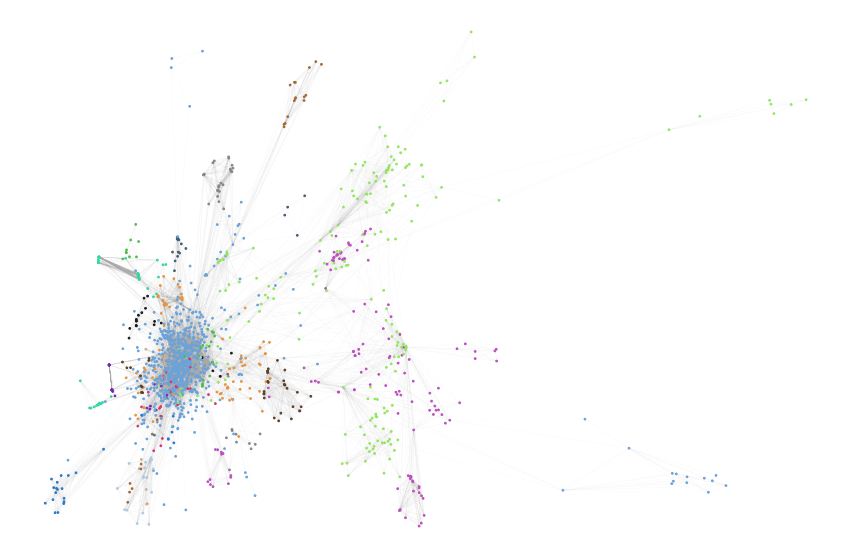

In [16]:
G.plot_communities(filename = 'communities_biggest_component')

Graph saved as ../TeX/img/communities_all_components.png


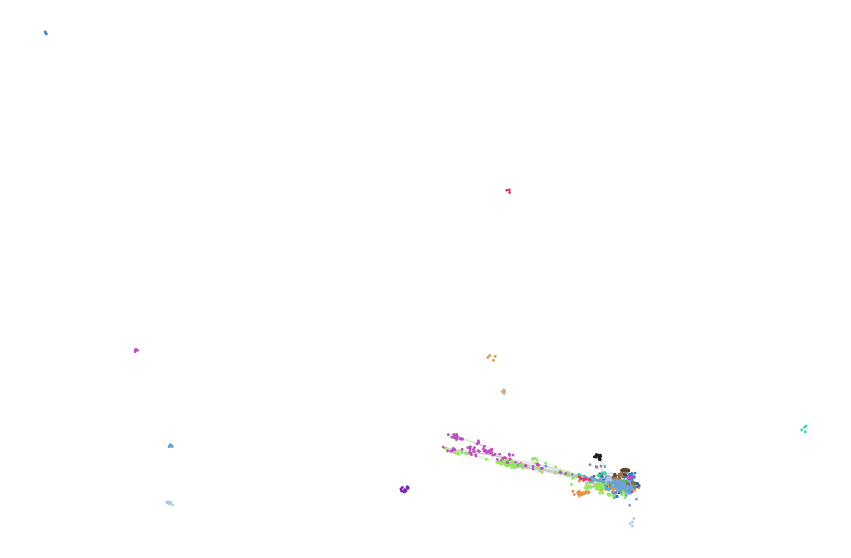

In [17]:
G.plot_communities(max_connected_components = 'all',
                   filename = 'communities_all_components')

In [18]:
G.Graph['Cascão']['Cebolinha']

{'weight': 458.5, 'community': 1}